In [1]:
# Load dataset
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set_theme()
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Import cleaned dataset
wine_df = pd.read_csv('Data/winequality_edited.csv')

## Q1: Is a certain type of wine (red or white) associated with higher quality?

In [3]:
# Find the mean quality of each wine type (red and white) with groupby
wine_df.groupby(['color'], as_index=False)['quality'].mean()

,color,quality
0,red,5.636023
1,white,5.877909


*The quality rating for red wine is slightly lower than for white wine*

## Q2: What level of acidity (pH value) receives the highest average rating?

In [4]:
# View the min, 25%, 50%, 75%, max pH values with Pandas describe
# Another way: df.describe().pH
wine_df.pH.describe()

count    6497.000000
mean        3.218501
std         0.160787
min         2.720000
25%         3.110000
50%         3.210000
75%         3.320000
max         4.010000
Name: pH, dtype: float64

In [37]:
# Bin edges that will be used to "cut" the data into groups
bin_edges = [2.72, 3.11, 3.21, 3.32, 4.01] # Fill in this list with five values you just found

In [38]:
# Labels for the four acidity level groups
bin_names = [ 'High', 'Mod_High', 'Medium', 'Low'] # Name each acidity level category

In [40]:
wine_df.acidity_levels.value_counts()

High        1717
Mod_High    1643
Low         1574
Medium      1562
Name: acidity_levels, dtype: int64

In [41]:
# Creates acidity_levels column
wine_df['acidity_levels'] = pd.cut(wine_df['pH'], bin_edges, labels=bin_names)
# Checks for successful creation of this column
wine_df.tail()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality,color,acidity_levels
6492,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6,white,Medium
6493,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5,white,Mod_High
6494,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6,white,High
6495,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7,white,Low
6496,6.0,0.21,0.38,0.8,0.020,22.0,98.0,0.98941,3.26,0.32,11.8,6,white,Medium


In [43]:
# Find the mean quality of each acidity level with groupby
# also: wine_df.groupby('acidity_levels').mean().quality
ph = wine_df.groupby(['acidity_levels'], as_index=False)['quality'].mean()
ph

,acidity_levels,quality
0,High,5.783343
1,Mod_High,5.784540
2,Medium,5.850832
3,Low,5.859593


*Low level of acidity receives the highest mean quality rating*

## Q3 Do wines with higher alcoholic content receive better ratings?

In [9]:
# get the median amount of alcohol content
alc_median = wine_df.alcohol.median()
alc_median

10.3

In [10]:
# select samples with alcohol content less than the median
# for query - use f-string (to avoid hard-coding or only quatation for not hard-coded: df.query(f'alcohol < 10.3'))
low_alcohol = wine_df.query(f'alcohol < {alc_median}')

# select samples with alcohol content greater than or equal to the median
high_alcohol = wine_df.query(f'alcohol >= {alc_median}')

# ensure these queries included each sample exactly once
num_samples = wine_df.shape[0]
num_samples == low_alcohol['quality'].count() + high_alcohol['quality'].count()

True

In [11]:
# get mean quality rating for the low alcohol and high alcohol groups
low_alcohol.quality.mean(), high_alcohol.quality.mean()

(5.475920679886686, 6.146084337349397)

*wines with higher alcoholic content generally receive better ratings*

In [12]:
# Rename column for easier use
wine_df.rename(columns={'residual sugar':'residual_sugar'}, inplace=True)

## Q4 Do sweeter wines receive better ratings?

In [13]:
# get the median amount of residual sugar
wine_df.residual_sugar.median()

3.0

In [14]:
# select samples with residual sugar less than the median
low_sugar = wine_df.query('residual_sugar < 3')

# select samples with residual sugar greater than or equal to the median
high_sugar = wine_df.query('residual_sugar >= 3')

# ensure these queries included each sample exactly once
num_samples == low_sugar['quality'].count() + high_sugar['quality'].count() # should be True

True

In [15]:
# get mean quality rating for the low sugar and high sugar groups
low_sugar.quality.mean(), high_sugar.quality.mean()

(5.808800743724822, 5.82782874617737)

*Sweeter wines generally receive higher ratings.*

### Visualizations

In [16]:
# Group by color and calculate mean on "quality".
wine_df.groupby('color')['quality'].mean()

color
red      5.636023
white    5.877909
Name: quality, dtype: float64

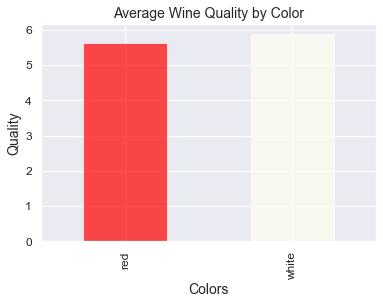

In [36]:
# Plot visualizations (You can just add plot to the end of groupby statement)
colors=['red', 'ivory']
# Group by color () and perform calculations on quality [].
#color_means = df.groupby('color')['quality'].mean().plot(kind='bar', title="Average Wine Quality by Color", color=colors, alpha=.7);
# You can just add plot to the end of groupby statement - useful for quick plots

# for more readable code organize code in more lines
color_means = wine_df.groupby('color')['quality'].mean()
color_means.plot(kind='bar', color=colors, alpha=.7, fontsize=12);

plt.xlabel('Colors', fontsize=14);
plt.ylabel('Quality', fontsize=14);
plt.title("Average Wine Quality by Color", fontsize=14);
# Save the figure.
plt.savefig("Visuals/WineQuality.png")

## Additional investigating with visuals 

In [18]:
# Make a count table - in order to calculate proportions for better comparison.
counts = wine_df.groupby(['quality', 'color']).count()
counts.head(5)

fixed_acidity  volatile_acidity  citric_acid  residual_sugar  \
quality color                                                                 
3       red               10                10           10              10   
        white             20                20           20              20   
4       red               53                53           53              53   
        white            163               163          163             163   
5       red              681               681          681             681   

               chlorides  free_sulfur_dioxide  total_sulfur_dioxide  density  \
quality color                                                                  
3       red           10                   10                    10       10   
        white         20                   20                    20       20   
4       red           53                   53                    53       53   
        white        163                  163                   163      163   
5       red          681                  681                   681      681   

                pH  sulphates  alcohol  acidity_levels  
quality color                                           
3       red     10         10       10              10  
        white   20         20       20              20  
4       red     53         53       53              53  
        white  163        163      163             163  
5       red    681        681      681             681

In [19]:
# Make a total count table - in order to calculate proportions for better comparison (only count is not a good
# choice since there is lots more reviews for white wine then for red wine.)
totals = wine_df.groupby(['color']).count()
totals

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality,acidity_levels
color,,,,,,,,,,,,,
red,1599,1599,1599,1599,1599,1599,1599,1599,1599,1599,1599,1599,1599
white,4898,4898,4898,4898,4898,4898,4898,4898,4898,4898,4898,4898,4897


Text(0, 0.5, 'Count')

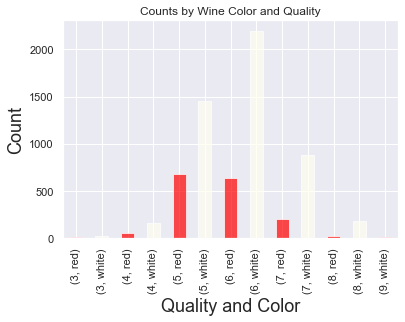

In [20]:
# Plot more detailed plot chart - counts for each quality rating by color
# Group by color & quality (pick an arbitrary column - count will be the same for all columns)
counts = wine_df.groupby(['quality', 'color']).count()['pH']
counts.plot(kind='bar', title='Counts by Wine Color and Quality', color=colors, alpha=.7);
plt.xlabel('Quality and Color', fontsize=18)
plt.ylabel('Count', fontsize=18)

Graph observations and improvements. There is clearly more white samples than red samples, so it's hard to make a fair comparison. To balance this divide count by total count for that color to use proportions instad. 

Text(0, 0.5, 'Proportion')

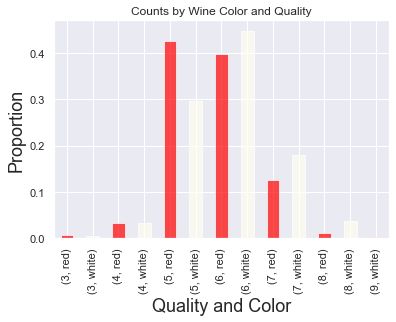

In [21]:
# Using proportions
totals = wine_df.groupby(['color']).count()['pH']
proportions = counts / totals
proportions.plot(kind='bar', title='Counts by Wine Color and Quality', color=colors, alpha=.7);
plt.xlabel('Quality and Color', fontsize=18)
plt.ylabel('Proportion', fontsize=18)

### Create arrays for red bar heights white bar heights
Remember, there's a bar for each combination of color and quality rating. Each bar's height is based on the proportion of samples of that color with that quality rating.
1. Red bar proportions = counts for each quality rating / total # of red samples
2. White bar proportions = counts for each quality rating / total # of white samples

In [22]:
# get counts for each rating and color
color_counts = wine_df.groupby(['color', 'quality']).count()['pH'] #ph is arbitrary all columns have the same count
color_counts

color  quality
red    3            10
       4            53
       5           681
       6           638
       7           199
       8            18
white  3            20
       4           163
       5          1457
       6          2198
       7           880
       8           175
       9             5
Name: pH, dtype: int64

In [23]:
# get total counts for each color
color_totals = wine_df.groupby('color').count()['pH']
color_totals

color
red      1599
white    4898
Name: pH, dtype: int64

In [24]:
# get proportions by dividing red rating counts by total # of red samples
red_proportions = color_counts['red'] / color_totals['red']
red_proportions

quality
3    0.006254
4    0.033146
5    0.425891
6    0.398999
7    0.124453
8    0.011257
Name: pH, dtype: float64

In [25]:
# Red proportion has a missing value - assign 0 to plot
red_proportions['9'] = 0
red_proportions

quality
3    0.006254
4    0.033146
5    0.425891
6    0.398999
7    0.124453
8    0.011257
9    0.000000
Name: pH, dtype: float64

In [26]:
# get proportions by dividing white rating counts by total # of white samples
white_proportions = color_counts['white'] / color_totals['white']
white_proportions

quality
3    0.004083
4    0.033279
5    0.297468
6    0.448755
7    0.179665
8    0.035729
9    0.001021
Name: pH, dtype: float64

### Plot proportions on a bar chart
Set the x coordinate location for each rating group and and width of each bar.

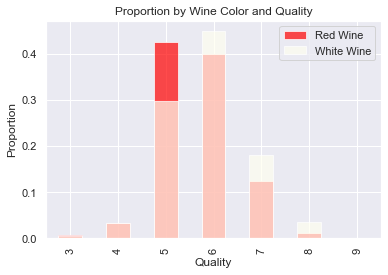

In [27]:
# plot bars
sns.set_style('darkgrid')
red_bars = red_proportions.plot(kind='bar', color='red', alpha=.7, label='Red Wine')
white_bars = white_proportions.plot(kind='bar', color='ivory', alpha=.7, label='White Wine')

# title and labels
plt.ylabel('Proportion')
plt.xlabel('Quality')
plt.title('Proportion by Wine Color and Quality')
#locations = width / 2  # xtick locations
labels = ['3', '4', '5', '6', '7', '8', '9']  # xtick labels
#plt.xticks(locations, labels)

# legend
plt.legend();

*plots are overlapping - improve the graph!*

In [28]:
ind = np.arange(len(red_proportions))  # the x locations for the groups
width = 0.35 #Shift the bars that doesn't overlap and barwidth

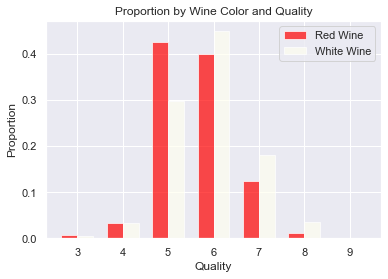

In [30]:
# plot bars
sns.set_style('darkgrid')
red_bars = plt.bar(ind, red_proportions, width, color='red', alpha=.7, label='Red Wine')
white_bars = plt.bar(ind + width, white_proportions, width, color='ivory', alpha=.7, label='White Wine')

# title and labels
plt.ylabel('Proportion')
plt.xlabel('Quality')
plt.title('Proportion by Wine Color and Quality')
locations = ind + width / 2  # xtick locations
labels = ['3', '4', '5', '6', '7', '8', '9']  # xtick labels
plt.xticks(locations, labels)

# legend
plt.legend();

# Save the figure.
plt.savefig("Visuals/WineQualityperType.png")

In [ ]:
# Save changes for the next section
wine_df.to_csv('Data/winequality_edited-final.csv', index=False)